## **PreParation**

In [23]:
import pandas as pd
import plotly.graph_objects as pg

**Drawing Candle Stick**

Candle Stick:



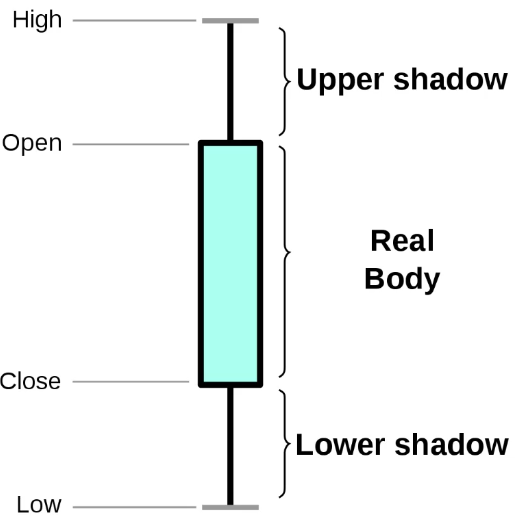

In [24]:
df = pd.read_csv('foolad.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
data = [pg.Candlestick(x=df.index, low=df['Low'], high=df['High'], close=df['Close'], open=df['Open'], increasing_line_color='green', decreasing_line_color='red')]
figure = pg.Figure(data=data)
figure.show()

In [25]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

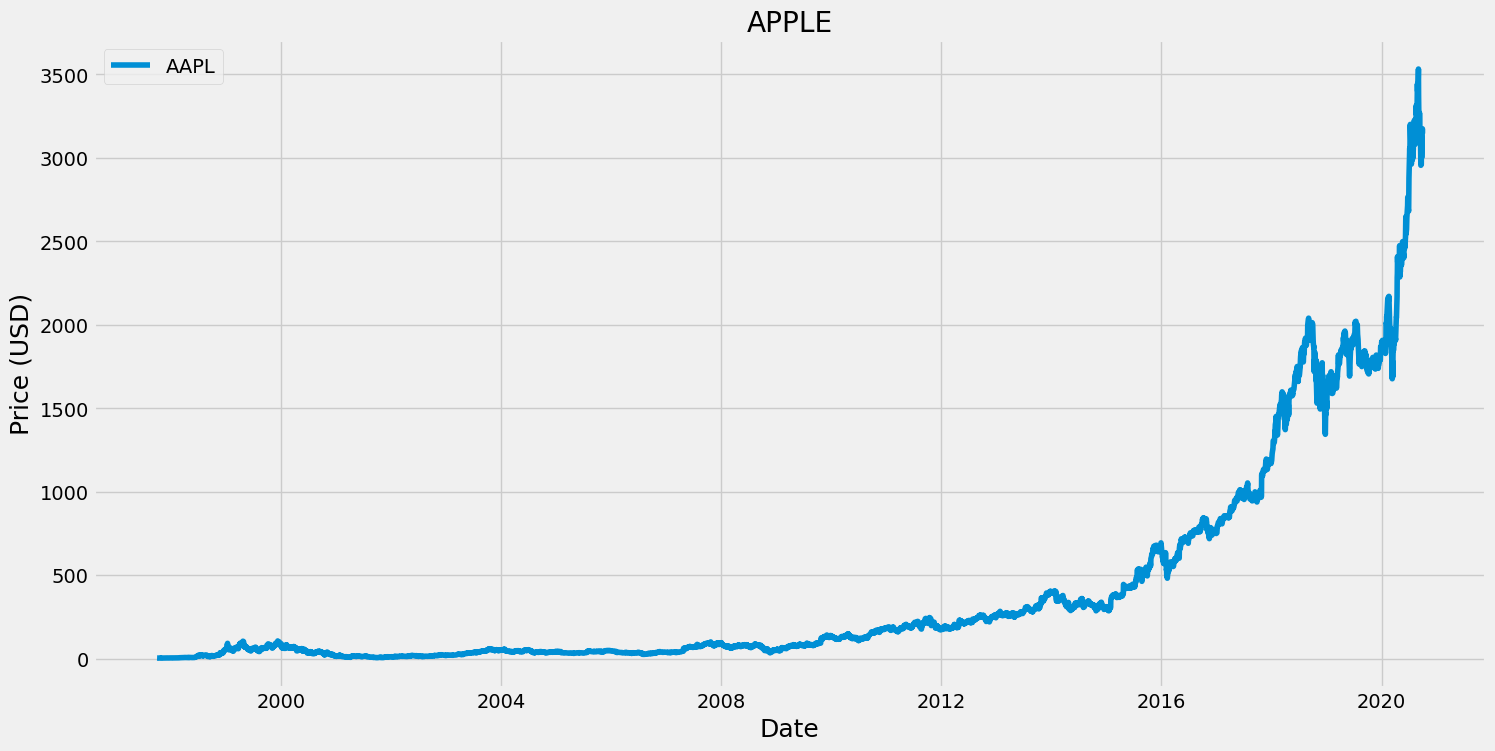

In [26]:
apple=pd.read_csv('amazon.csv')
apple=apple.set_index(pd.DatetimeIndex(apple['Date'].values))
plt.figure(figsize=(16,8))
plt.plot(apple['Adj Close'],label='AAPL')
plt.title('APPLE')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price (USD)',fontsize=18)
plt.legend()
plt.show()

**Close --> Adj Close**

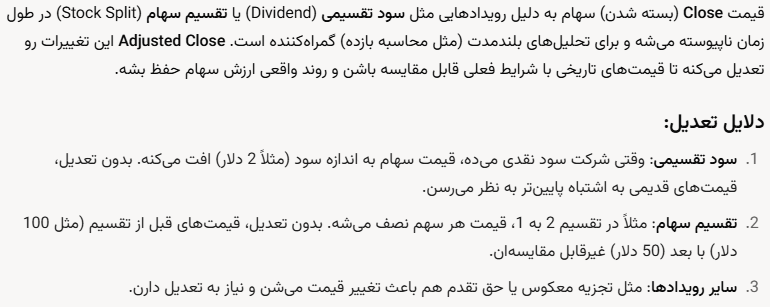

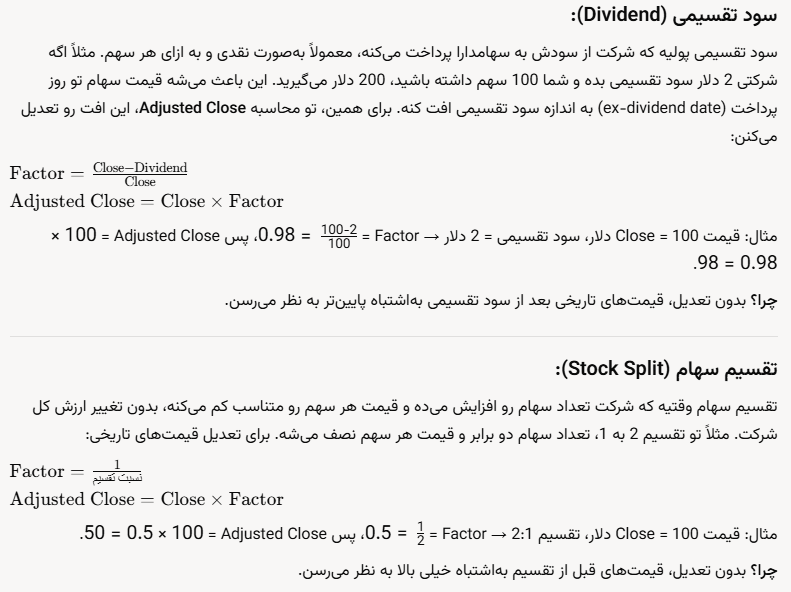

**Simple Moving Average indicator**

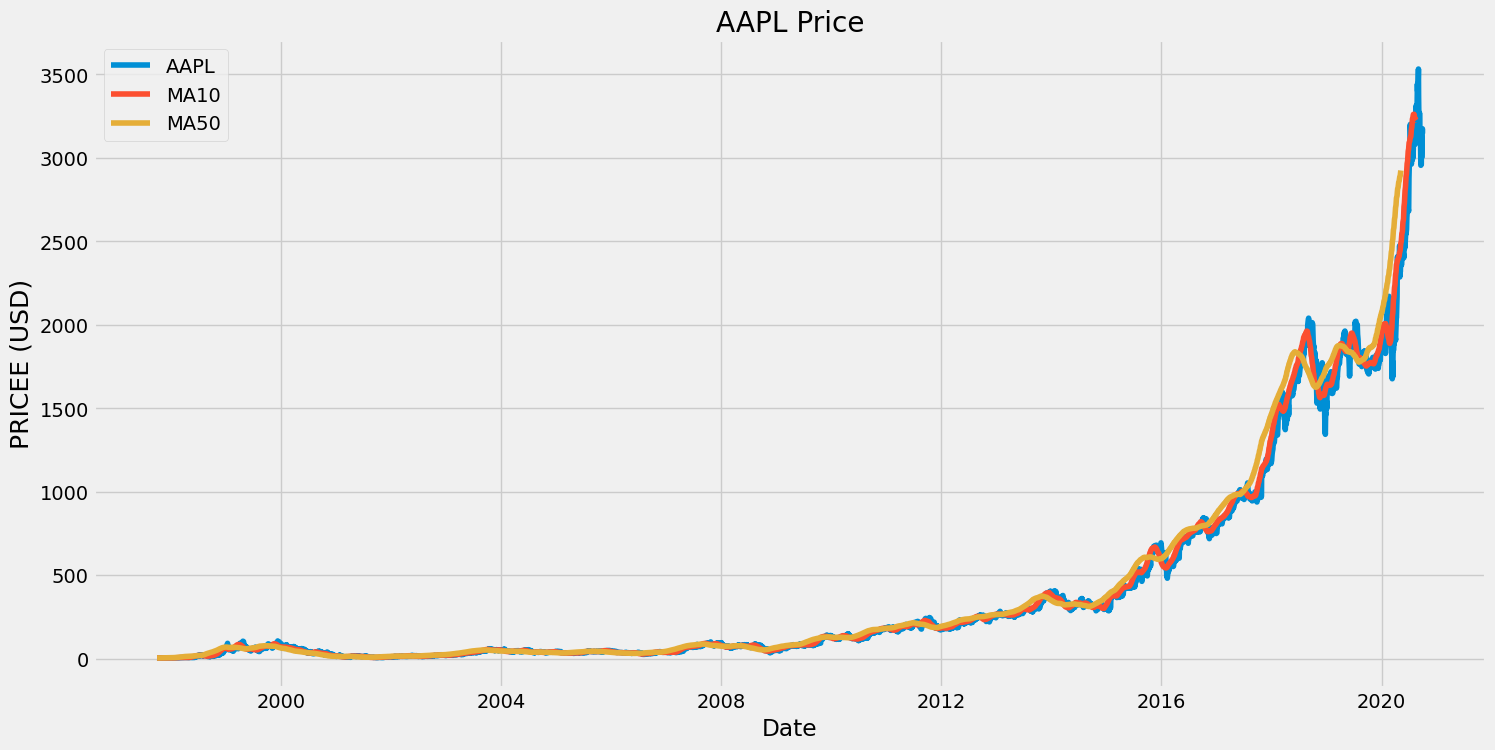

In [31]:
ma10=pd.DataFrame()
ma10['AM']=apple['Adj Close'].rolling(window=30).mean()
ma50=pd.DataFrame()
ma50['AM']=apple['Adj Close'].rolling(window=100).mean()

plt.figure(figsize=(16,8))
plt.plot(apple['Close'],label='AAPL')
plt.plot(ma10,label='MA10')
plt.plot(ma50,label="MA50")
plt.title('AAPL Price')
plt.xlabel('Date')
plt.ylabel('PRICEE (USD)',fontsize=18)
plt.legend()
plt.show()

سیگنال خرید (گرون شدن سهام):
وقتی SMA 50 از SMA 200 به سمت بالا رد بشه (Golden Cross).
معنی: روند صعودی شروع شده، قیمت احتمالاً بالا می‌ره.

#----------------------------------------------------------#

سیگنال فروش (ارزون شدن سهام):
وقتی SMA 50 از SMA 200 به سمت پایین رد بشه (Death Cross).
معنی: روند نزولی شروع شده، قیمت احتمالاً پایین می‌آد.


**ما در این پروژه دو بازه 50 و 200 روزه را مدنظر می گیریم

In [28]:
data=pd.DataFrame()
data['AAPL']=apple['Adj Close']
data['MA50']=ma10['AM']
data['MA200']=ma50['AM']

In [30]:
def signal(data) : 
    signalBuy=[]
    signalSell=[]
    f=-1
    for i in range(len(data)):
        if data['MA50'][i]>data['MA200'][i]:
            if f!=1:
                signalBuy.append(data['AAPL'][i])
                signalSell.append(np.nan)
                f=1
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['MA50'][i]<data['MA200'][i]: 
            if f!=0:
                signalBuy.append(np.nan)
                signalSell.append(data['AAPL'][i])
                f=0
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan) 

    return (signalBuy , signalSell )

In [32]:
buy_sell = signal(data)
data['buy signal']=buy_sell[0]
data['sell signal']=buy_sell[1]
data

,AAPL,MA10,MA50,buy signal,sell signal
2020-09-29,3144.879883,NaN,NaN,NaN,NaN
2020-09-28,3174.050049,NaN,NaN,NaN,NaN
2020-09-25,3095.129883,NaN,NaN,NaN,NaN
2020-09-24,3019.790039,NaN,NaN,NaN,NaN
2020-09-23,2999.860107,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1997-10-06,4.125000,4.336806,4.664167,NaN,NaN
1997-10-03,4.015625,4.331771,4.640156,NaN,NaN
1997-10-02,4.010417,4.336806,4.619635,NaN,NaN
1997-10-01,4.020833,4.345139,4.604948,NaN,NaN


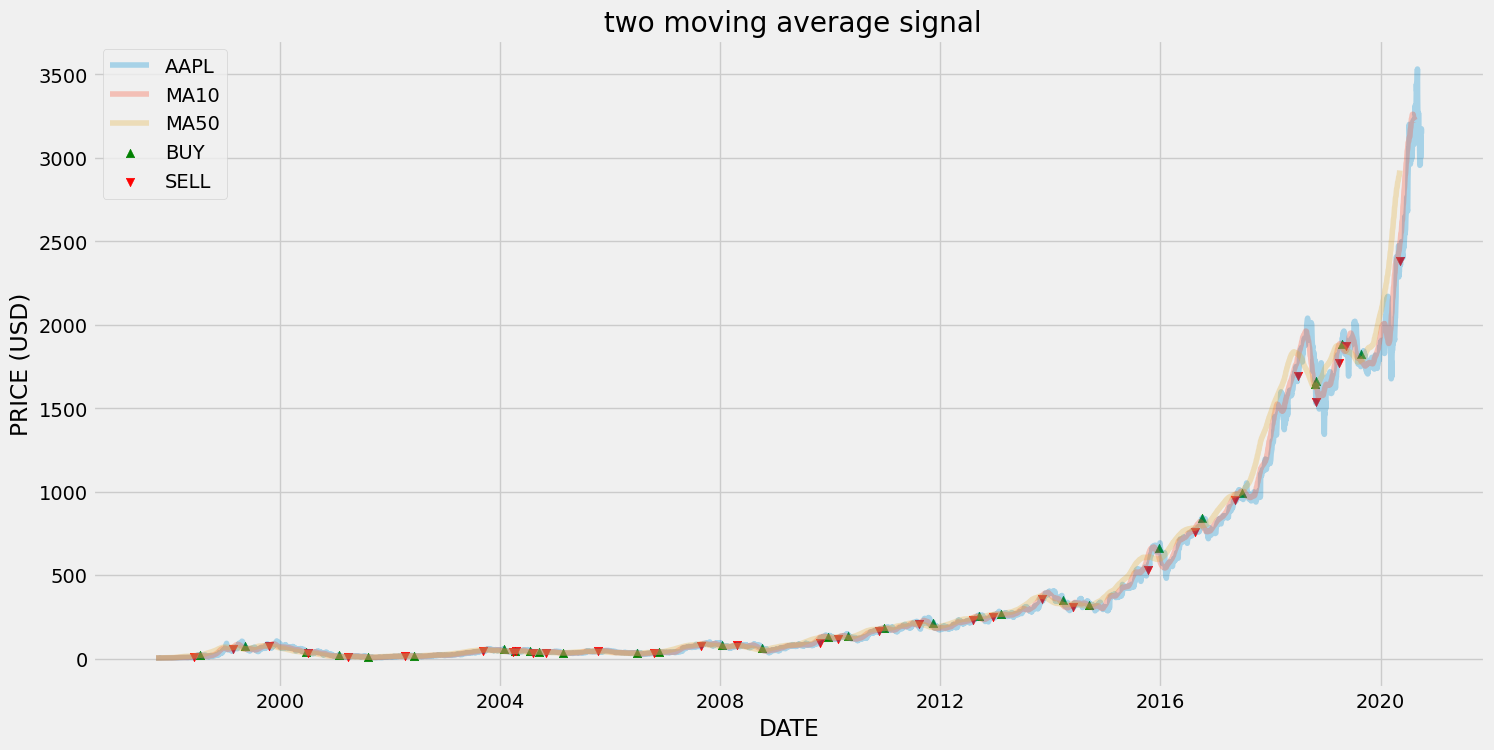

In [35]:
plt.figure(figsize=(16,8))
plt.plot(data['AAPL'],label='AAPL',alpha=0.3)
plt.plot(data['MA50'],label='MA50',alpha=0.3)
plt.plot(data['MA200'],label="MA200",alpha=0.3)
plt.scatter(data.index,data['buy signal'],label='BUY',marker='^',color='green')
plt.scatter(data.index,data['sell signal'],label='SELL',marker='v',color='red')
plt.title(' two moving average signal') 
plt.xlabel('DATE')
plt.ylabel('PRICE (USD)')
plt.legend()
plt.show()         

**Money Flow Index indicator**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('amazon.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df=df.tail(500)
df

,Date,Open,High,Low,Close,Adj Close,Volume
1999-09-23,9/23/1999,67.000000,68.750000,61.234375,62.250000,62.250000,14373600
1999-09-22,9/22/1999,62.875000,66.500000,60.687500,66.000000,66.000000,10037500
1999-09-21,9/21/1999,61.625000,63.937500,61.000000,62.250000,62.250000,8232500
1999-09-20,9/20/1999,63.687500,65.000000,62.687500,62.750000,62.750000,5957100
1999-09-17,9/17/1999,65.625000,66.000000,62.750000,63.812500,63.812500,7239500
...,...,...,...,...,...,...,...
1997-10-06,10/6/1997,4.000000,4.125000,3.942708,4.125000,4.125000,2028000
1997-10-03,10/3/1997,4.083333,4.125000,3.979167,4.015625,4.015625,1164000
1997-10-02,10/2/1997,4.041667,4.177083,3.989583,4.010417,4.010417,1876800
1997-10-01,10/1/1997,4.437500,4.500000,3.937500,4.020833,4.020833,4999200


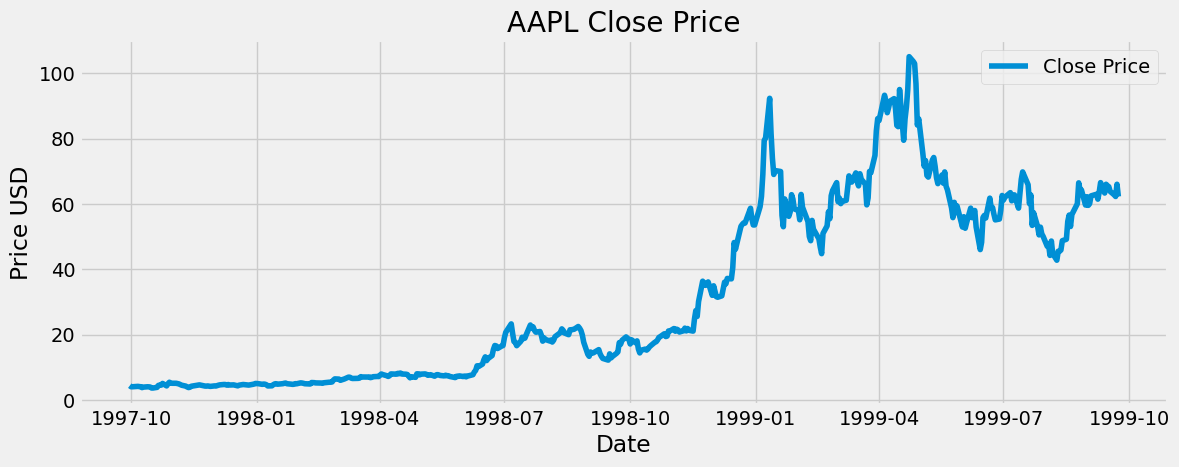

In [4]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Close'],label='Close Price')
plt.title('AAPL Close Price')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.legend()
plt.show()

**MFI paper:**

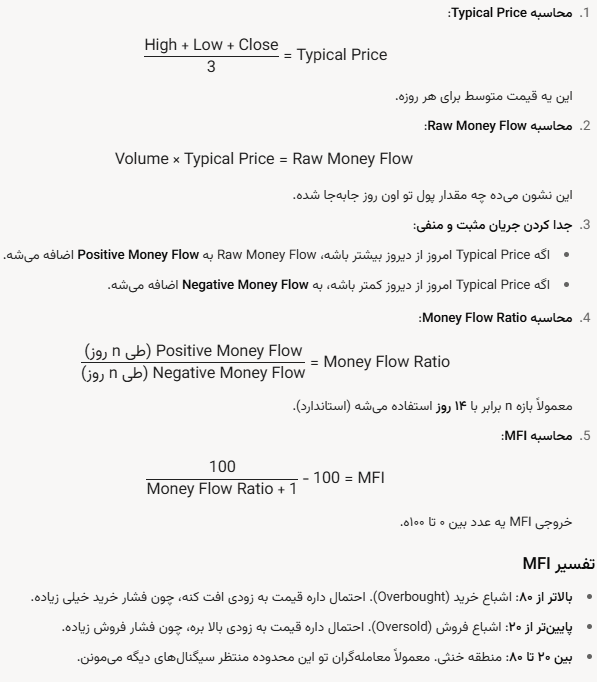

In [5]:
#MFI paper
typical_price=(df['Close']+df['High']+df['Low'])/3
period=14  #n_days
money_flow=typical_price*df['Volume']
###
positive_flow=[]
negative_flow=[]
for i in range(1,len(typical_price)):
    if typical_price[i]>typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i]<typical_price[i-1]:
        positive_flow.append(0)
        negative_flow.append(money_flow[i-1])
        
    else :
        positive_flow.append(0)
        negative_flow.append(0)
###
positive_mf=[]
negative_mf=[]
for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))      
for i in range(period-1,len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))     
###
money_flow_ratio = np.array(positive_mf)/np.array(negative_mf)
mfi = 100 - 100/(money_flow_ratio+1)
mfi

array([43.5900052 , 44.16039058, 40.86391799, 48.991067  , 52.36777409,
       53.83772659, 46.76882056, 43.85074982, 40.98525227, 35.9193552 ,
       36.00349435, 41.47846516, 35.86683479, 34.43211678, 35.24870248,
       30.13049012, 31.53036361, 19.90576594, 12.33637323, 10.76331532,
       10.97024597, 10.68198426, 18.31471521, 27.60034316, 33.28112743,
       31.46331922, 40.26886249, 44.49026231, 52.14002885, 59.91300516,
       55.62109002, 67.79244188, 67.62056433, 68.54013733, 73.6792686 ,
       78.38517269, 69.58666563, 61.6316887 , 55.17503124, 55.26449795,
       51.44793722, 49.43685821, 47.51987523, 39.01120236, 42.32021816,
       31.50913408, 31.57964498, 23.13066943, 24.92330408, 29.80119049,
       37.1579174 , 47.30701674, 48.40795349, 40.96766743, 44.72508221,
       43.0480285 , 35.78902254, 36.03763236, 42.50730675, 41.9333971 ,
       43.03692235, 48.89723961, 48.34809607, 41.9497244 , 44.58378269,
       44.46358607, 56.20861956, 63.8353332 , 59.96417078, 61.30

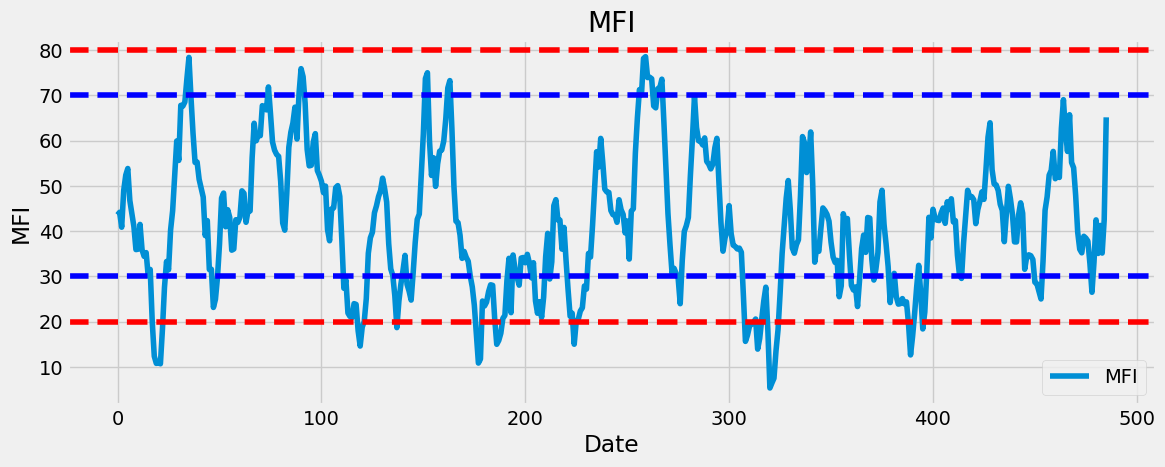

In [6]:
df2=pd.DataFrame()
df2['MFI']=mfi
plt.figure(figsize=(12.5,4.5))
plt.plot(df2['MFI'],label='MFI')
plt.axhline(20,linestyle='--',color="r")
plt.axhline(30,linestyle='--',color="b")
plt.axhline(70,linestyle='--',color="b")
plt.axhline(80,linestyle='--',color="r")
plt.title('MFI')
plt.xlabel('Date')
plt.ylabel('MFI')
plt.legend()
plt.show()

Text(0.5, 1.0, 'MFI Visualizer')

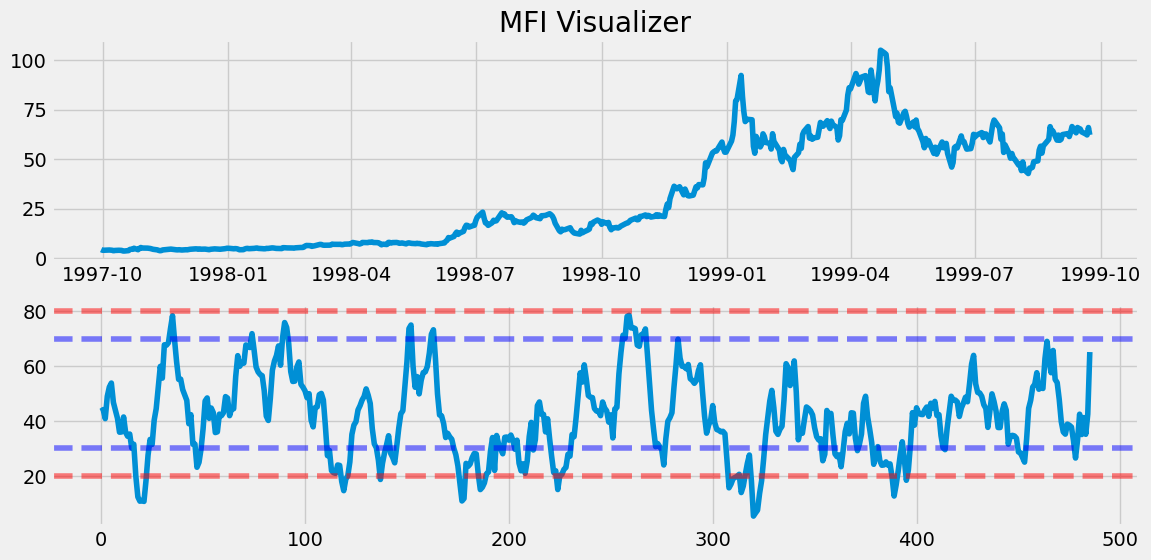

In [7]:
fig , (ax1 , ax2)=plt.subplots(nrows=2,ncols=1,figsize=(12.5,6))
ax1.plot(df['Close'],label='Close Price')
ax2.plot(df2['MFI'],label='MFI')
ax2.axhline(20,linestyle='--',color="r",alpha=0.5)
ax2.axhline(30,linestyle='--',color="b",alpha=0.5)
ax2.axhline(70,linestyle='--',color="b",alpha=0.5)
ax2.axhline(80,linestyle='--',color="r",alpha=0.5)
ax1.set_title('MFI Visualizer')

**Relative Strength Index indicator**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

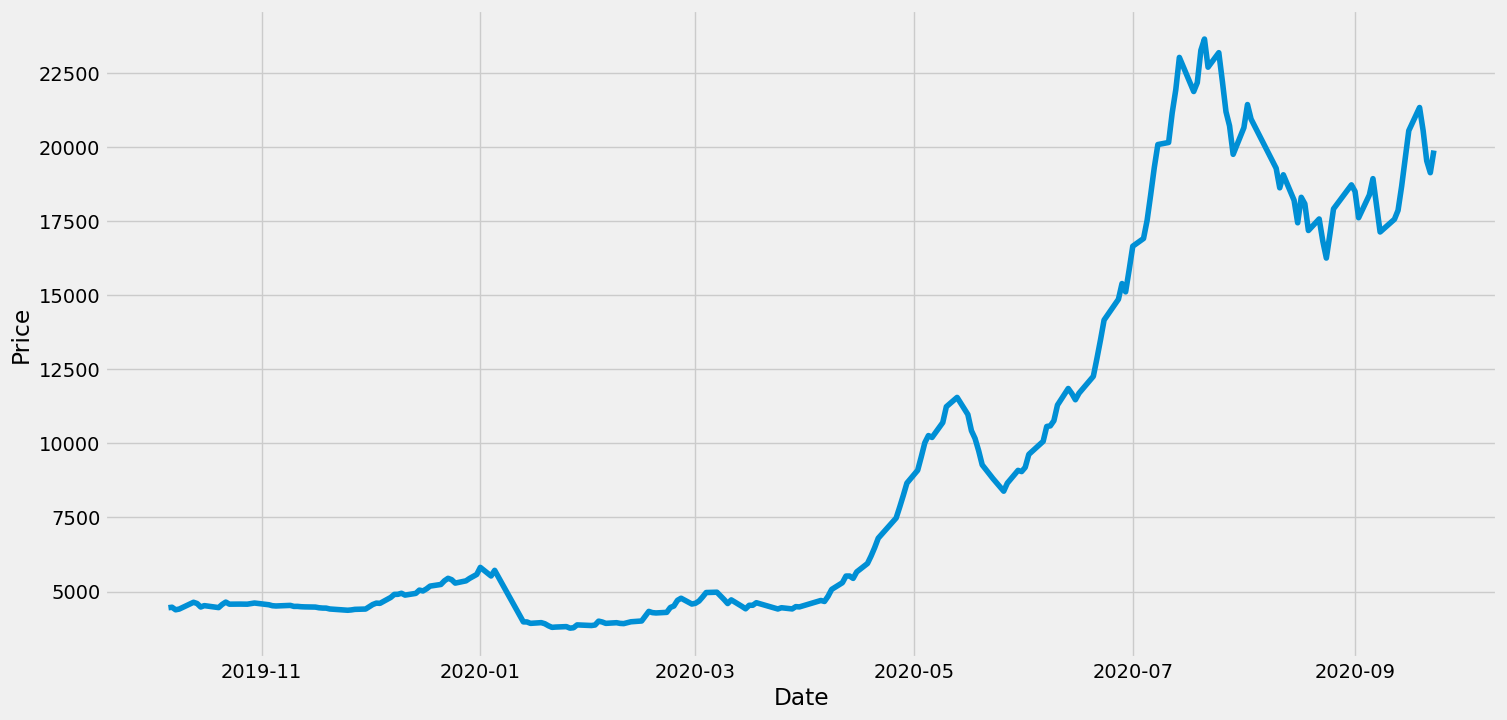

In [3]:
df=pd.read_csv('foolad.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df=df.tail(220)
###
plt.figure(figsize=(16,8))
plt.plot(df.index,df['Close'],label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
delta=df['Close'].diff(1)
delta.dropna()

2019-10-07      17.0
2019-10-08     -86.0
2019-10-09      24.0
2019-10-12     174.0
2019-10-13      55.0
               ...  
2020-09-19     780.0
2020-09-20    -780.0
2020-09-21   -1020.0
2020-09-22    -400.0
2020-09-23     750.0
Name: Close, Length: 219, dtype: float64

RSI indicator:

avgGain = میانگین مقادیر قیمت های بسته شده در روز هایی که قیمت از دیروز بیشتر است

avgLoss = میانگین مقادیر قیمت های بسته شده در روز هایی که قیمت از دیروز کمتر است

preiod = 14 معمولا

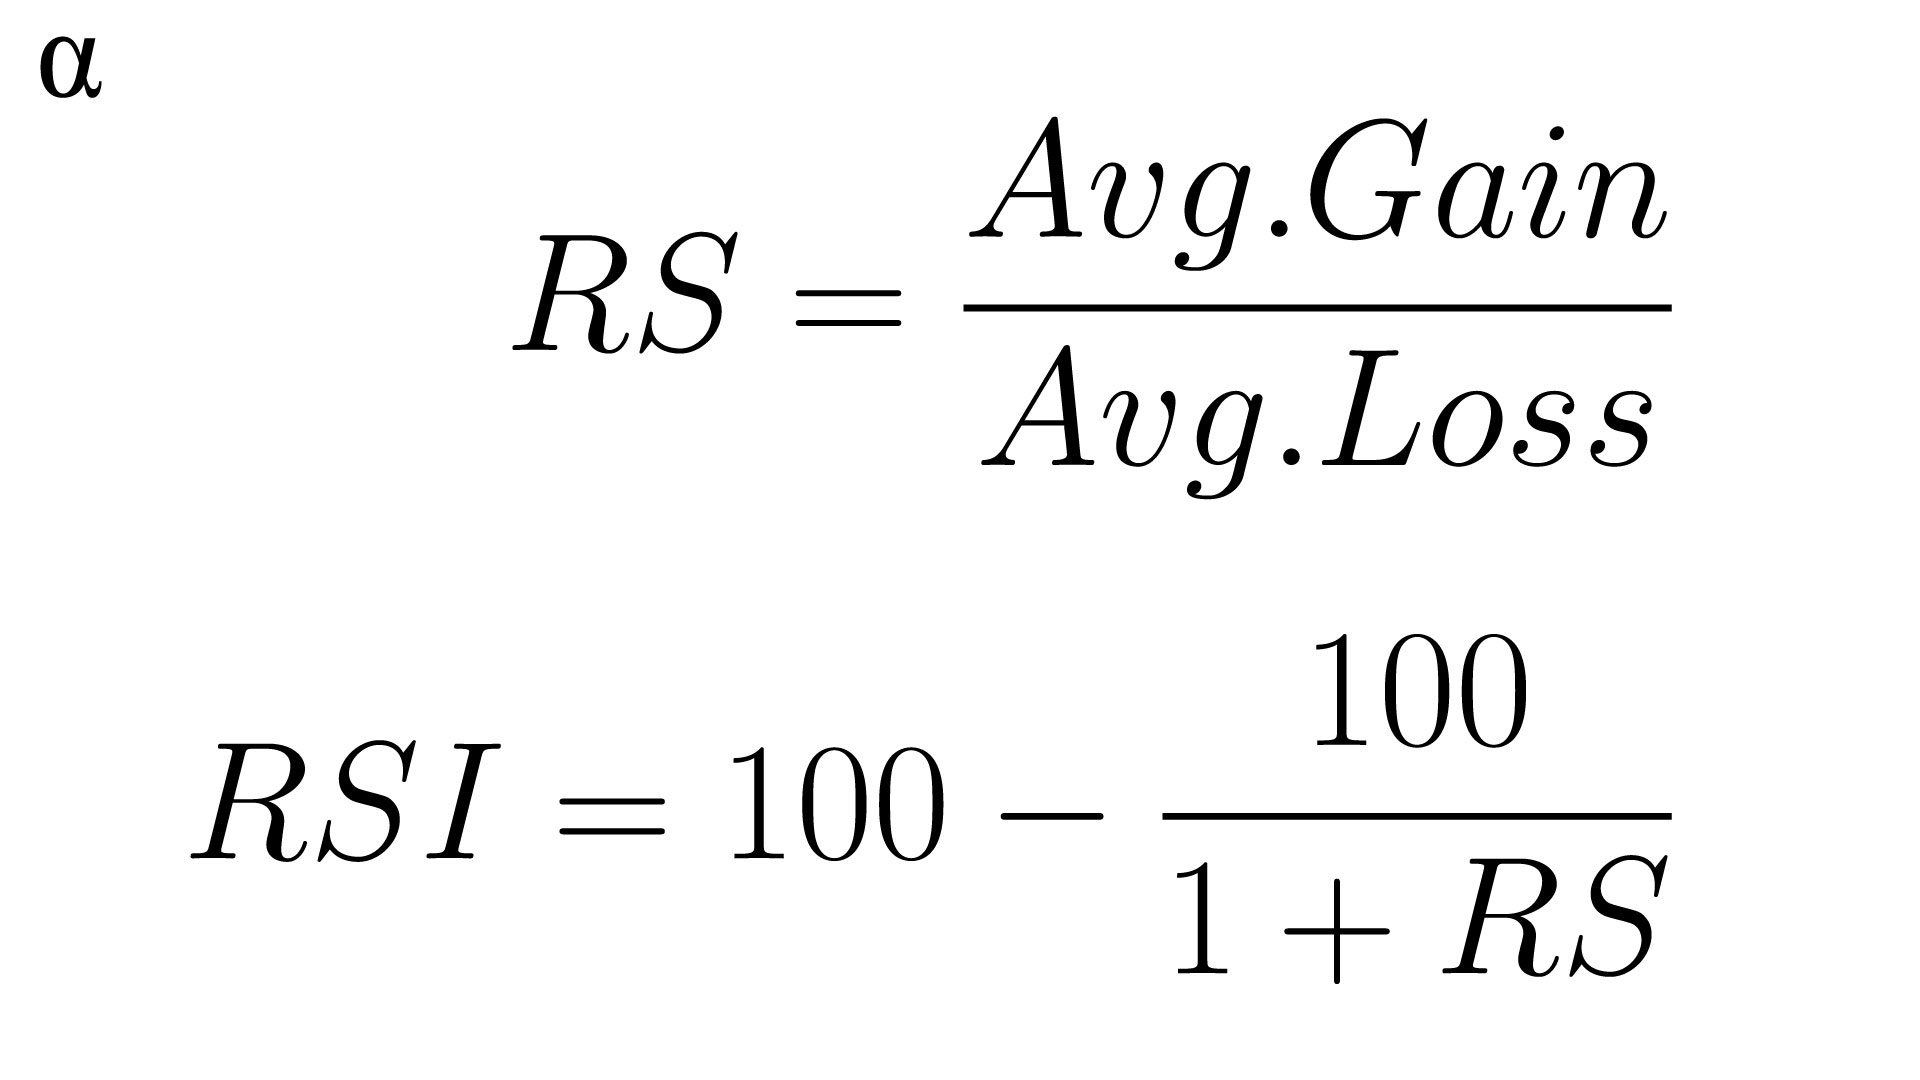

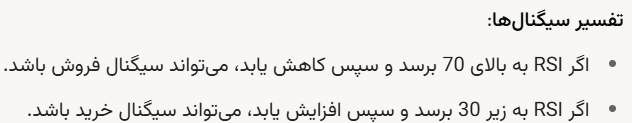

In [5]:
up=delta.copy()
down=delta.copy()
up[up<0]=0
down[down>0]=0
###
period=14
avg_gain=up.rolling(window=period).mean()
avg_loss=abs(down.rolling(window=period).mean())
RS = avg_gain/avg_loss
RSI = 100.0 - (100.0/(1.0+RS))

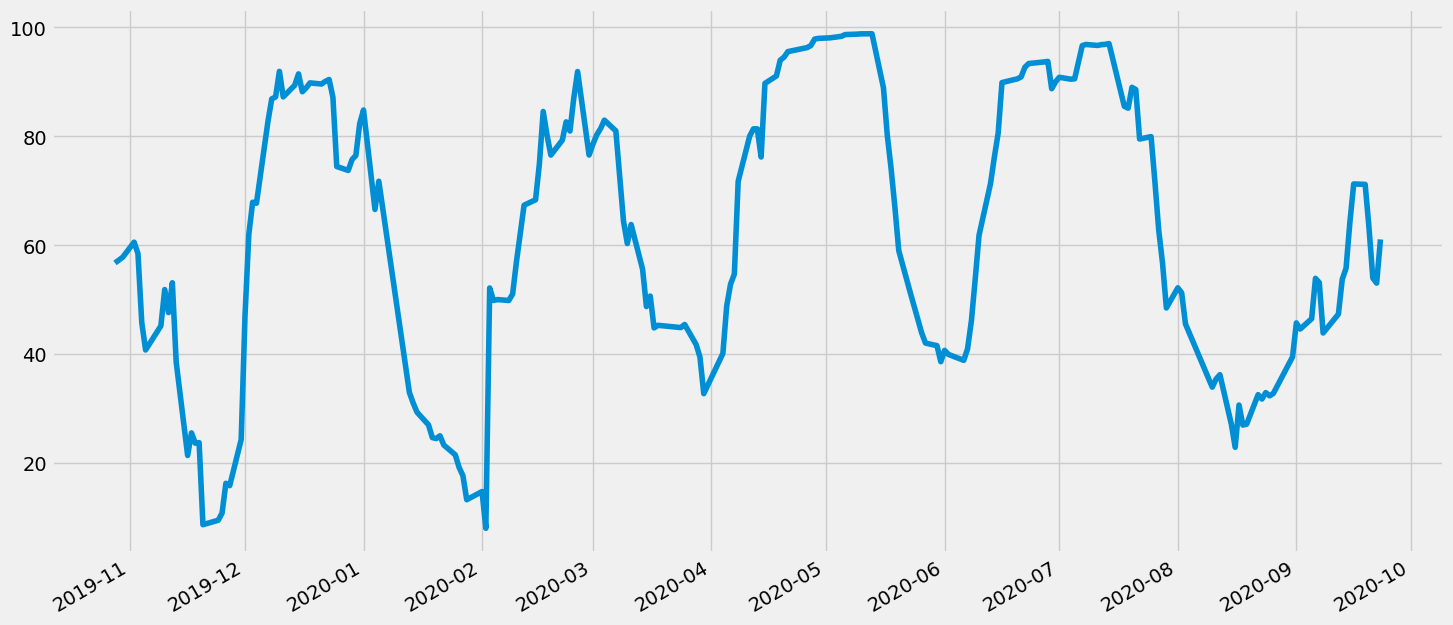

In [6]:
plt.figure(figsize=(16,8))
RSI.plot()
plt.show()

In [7]:
newdf=pd.DataFrame()
newdf['Close']=df['Close']
newdf['RSI']=RSI
newdf

,Close,RSI
2019-10-06,4453,NaN
2019-10-07,4470,NaN
2019-10-08,4384,NaN
2019-10-09,4408,NaN
2019-10-12,4582,NaN
...,...,...
2020-09-19,21330,71.159564
2020-09-20,20550,63.173653
2020-09-21,19530,53.958944
2020-09-22,19130,53.025937


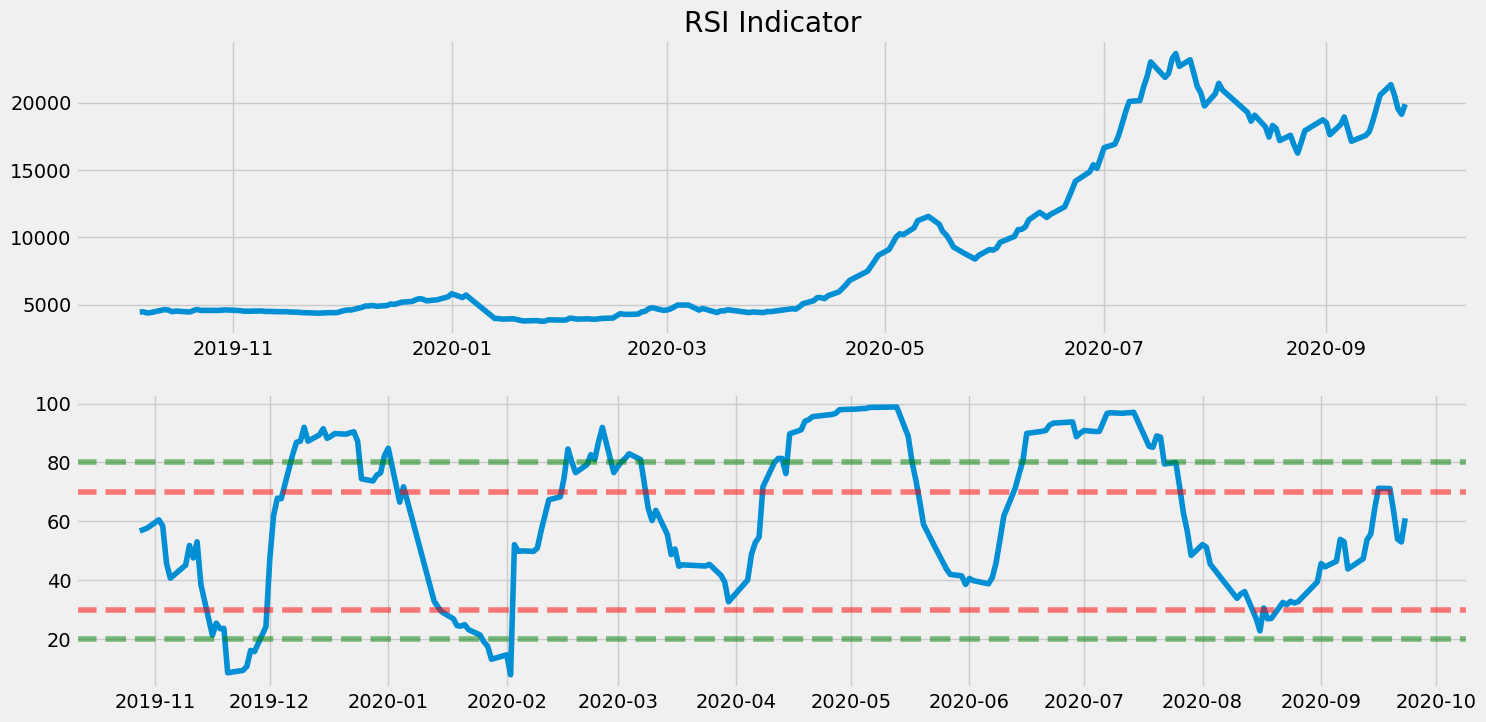

In [9]:
fig , (ax1 , ax2)=plt.subplots(nrows=2 , ncols=1 , figsize=(16,8))
ax1.plot(newdf['Close'],label='Close Price')
ax2.plot(newdf['RSI'],label='RSI')
ax2.axhline(20 , linestyle='--',color='green',alpha=0.5)
ax2.axhline(30 , linestyle='--',color='red',alpha=0.5)
ax2.axhline(70 , linestyle='--',color='red',alpha=0.5)
ax2.axhline(80 , linestyle='--',color='green',alpha=0.5)
ax1.set_title('RSI Indicator')
plt.show()

**Moving Average Convergence Divergence indicator**

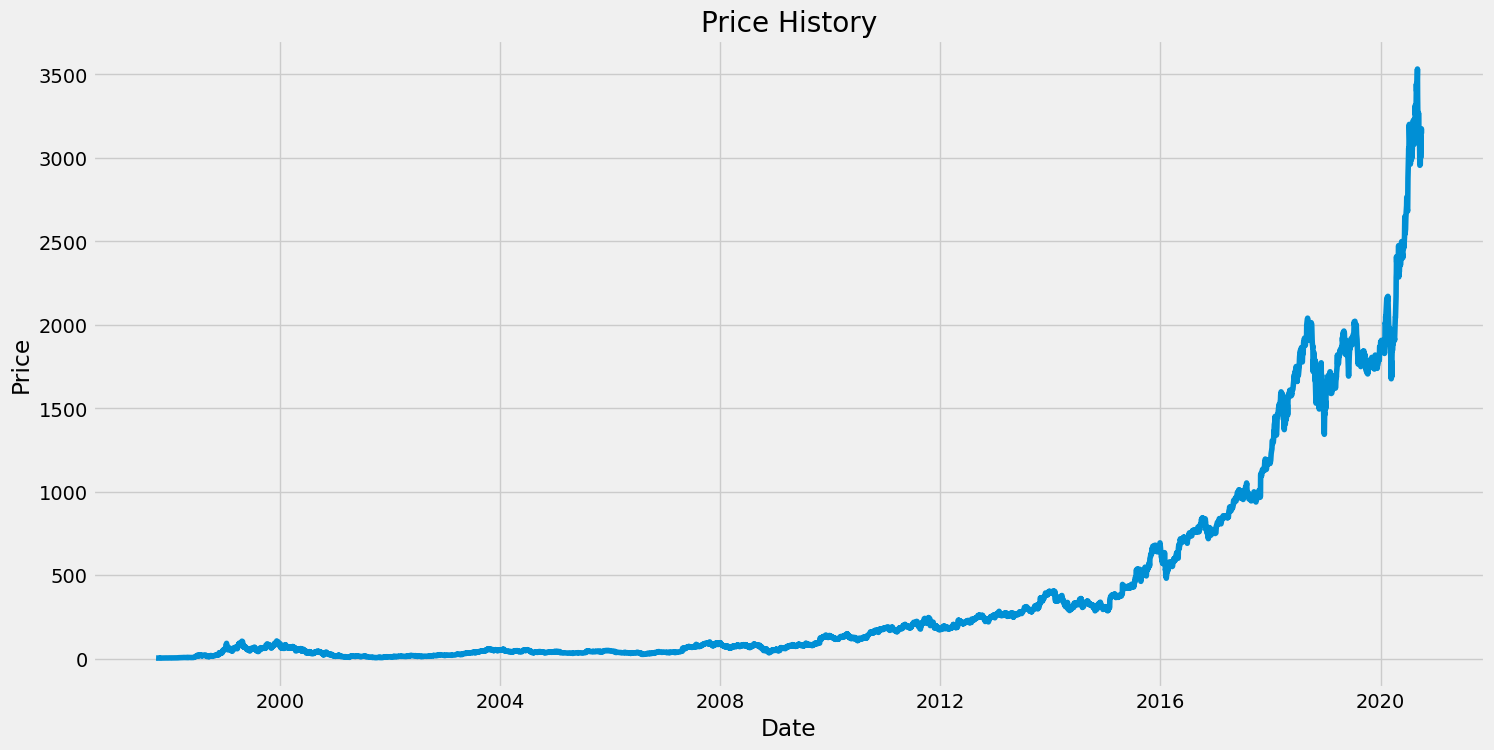

In [17]:
df=pd.read_csv('amazon.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
# df=df.tail(220)
###
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price')
plt.title('Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [18]:
shortEMA =df.Close.ewm(span=12 , adjust=False).mean()
longEMA =df.Close.ewm(span=26 , adjust=False).mean()
MACD = shortEMA - longEMA
signal = MACD.ewm(span=9 , adjust = False).mean()

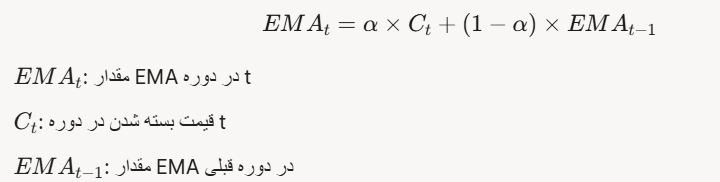


alpha = 2 / (t+1)



#######################


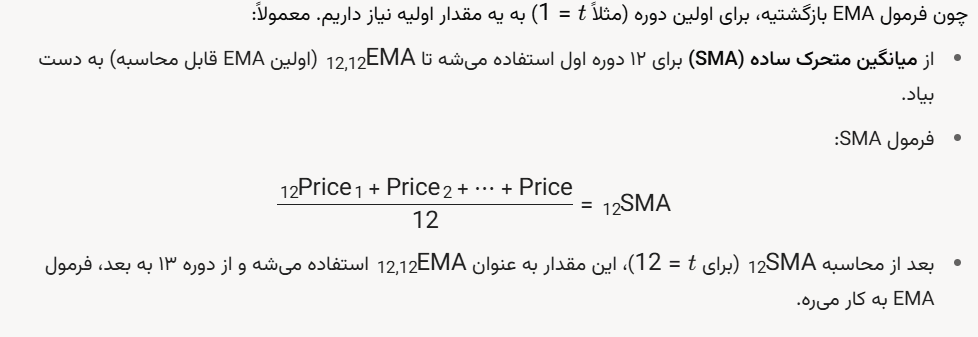

#######################

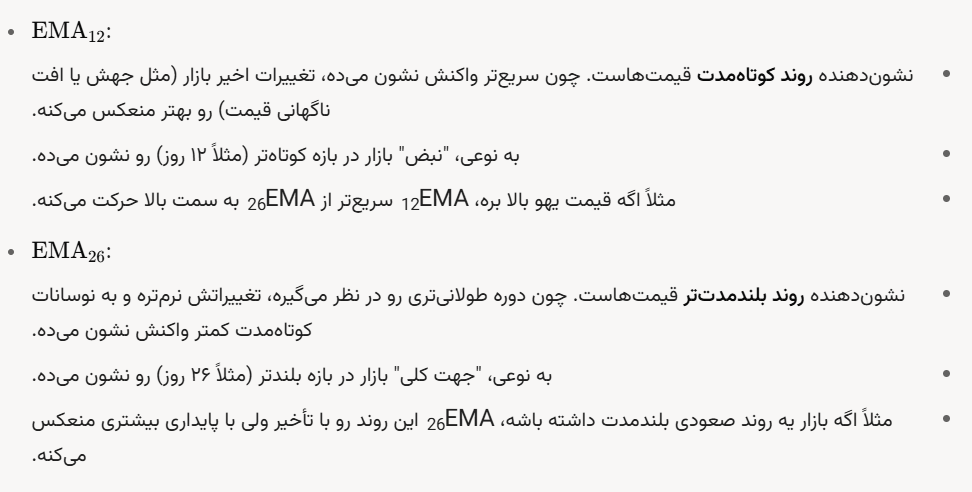

#######################

#######################

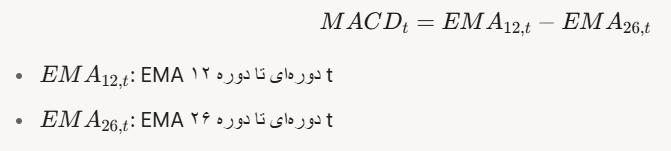

#######################

#######################

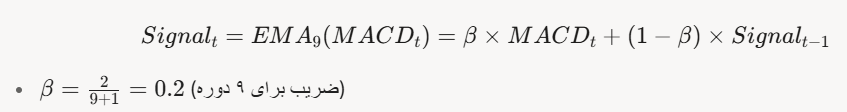
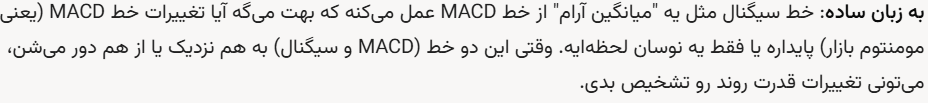

#######################

#######################

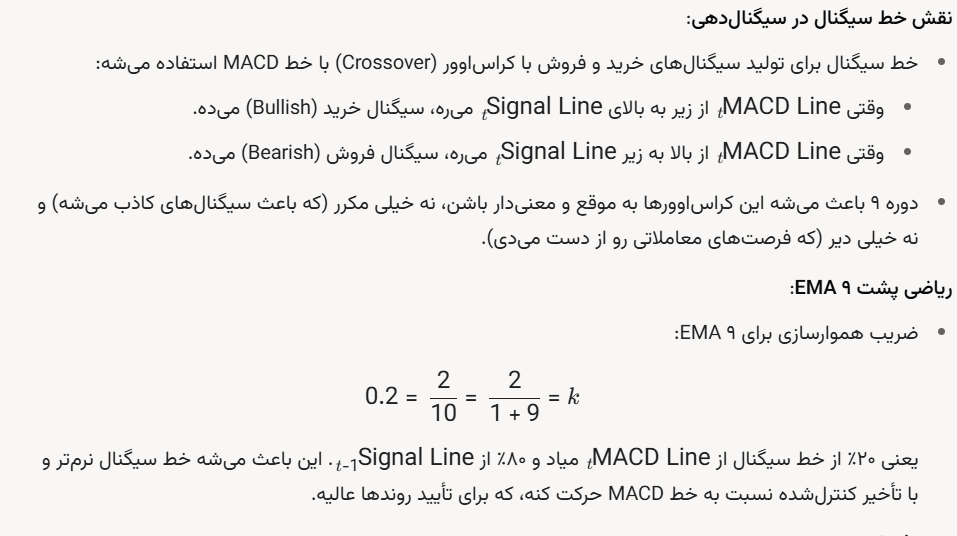

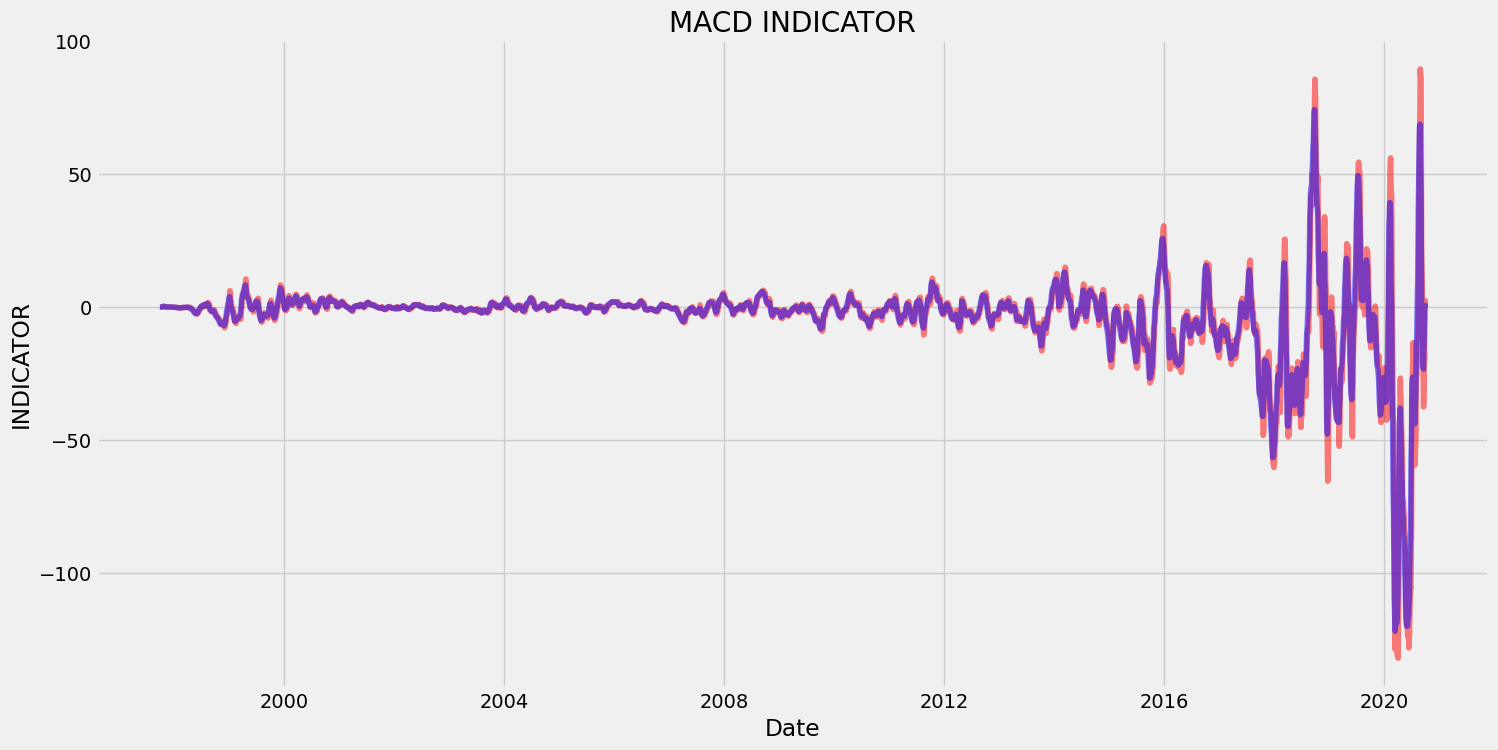

In [19]:
plt.figure(figsize=(16,8))
plt.plot(df.index , MACD , label='MACD' , color='red' , alpha=0.5)
plt.plot(df.index , signal , label='Signal' , color='blue' , alpha=0.5)
plt.title('MACD INDICATOR')
plt.xlabel('Date')
plt.ylabel('INDICATOR')
plt.show()

In [20]:
df['MACD']=MACD
df['signal line']=signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,signal line
2020-09-29,9/29/2020,3175.389893,3188.260010,3132.540039,3144.879883,3144.879883,3495800,0.000000,0.000000
2020-09-28,9/28/2020,3148.850098,3175.040039,3117.169922,3174.050049,3174.050049,4224200,2.326965,0.465393
2020-09-25,9/25/2020,3054.860107,3101.540039,2999.000000,3095.129883,3095.129883,4615200,-2.172059,-0.062097
2020-09-24,9/24/2020,2977.790039,3069.300049,2965.000000,3019.790039,3019.790039,5529400,-11.682198,-2.386117
2020-09-23,9/23/2020,3120.429932,3127.000000,2992.379883,2999.860107,2999.860107,5652700,-20.589883,-6.026870
...,...,...,...,...,...,...,...,...,...
1997-10-06,10/6/1997,4.000000,4.125000,3.942708,4.125000,4.125000,2028000,-0.156559,-0.147843
1997-10-03,10/3/1997,4.083333,4.125000,3.979167,4.015625,4.015625,1164000,-0.148885,-0.148052
1997-10-02,10/2/1997,4.041667,4.177083,3.989583,4.010417,4.010417,1876800,-0.141591,-0.146759
1997-10-01,10/1/1997,4.437500,4.500000,3.937500,4.020833,4.020833,4999200,-0.133432,-0.144094


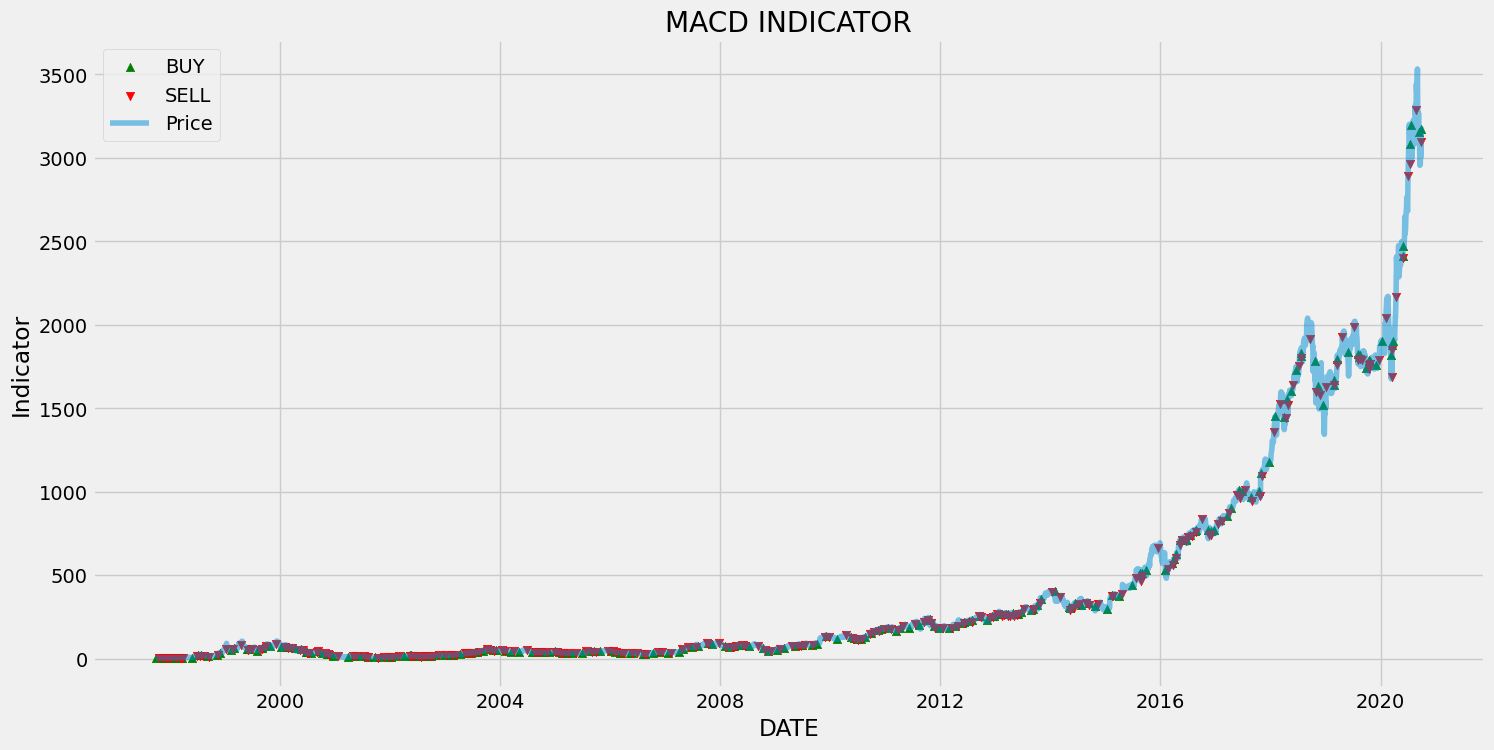

In [21]:
def buy_sell(signal):
    buy=[]
    sell=[]
    f = -1
    for i in range(0 , len(signal)):
        if signal['MACD'][i] > signal['signal line'][i]:
            sell.append(np.nan)
            if f != 1:
                buy.append(signal['Close'][i])
                f=1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i] < signal['signal line'][i]:
            buy.append(np.nan)
            if f != 0:
                sell.append(signal['Close'][i])
                f=0
            else:
                sell.append(np.nan) 
                
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return  buy , sell  
###
a = buy_sell(df)
df['Buy_Signal'] = a[0]
df['Sell_Signal'] = a[1]
###
plt.figure(figsize=(16,8))
plt.scatter(df.index , df['Buy_Signal'] , color='green', label='BUY' , marker='^')
plt.scatter(df.index , df['Sell_Signal'] , color='red', label='SELL' , marker='v')
plt.plot(df['Close'],label='Price',alpha = 0.5)
plt.title('MACD INDICATOR')
plt.xlabel('DATE')
plt.ylabel('Indicator')
plt.legend()
plt.show()